In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
rc('font', family='HCR Dotum')

pd.options.display.float_format = '{:.3f}'.format

In [2]:
# 데이터 불러오기
def csv(file_name):
    return pd.read_csv('빅분기 실기/'+ file_name +".csv", encoding='cp949')

## mtcars min-max 0.5이상

In [13]:
csv("mtcars").head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.000,6,160.000,110,3.900,2.620,16.460,0,1,4,4
1,Mazda RX4 Wag,21.000,6,160.000,110,3.900,2.875,17.020,0,1,4,4
2,Datsun 710,22.800,4,108.000,93,3.850,2.320,18.610,1,1,4,1
3,Hornet 4 Drive,21.400,6,258.000,110,3.080,3.215,19.440,1,0,3,1
4,Hornet Sportabout,18.700,8,360.000,175,3.150,3.440,17.020,0,0,3,2


In [14]:
# 데이터 불러오기 2
mtcars = pd.read_csv("빅분기 실기/mtcars.csv", encoding="cp949")

In [15]:
mtcars.dtypes

Unnamed: 0     object
mpg           float64
cyl             int64
disp          float64
hp              int64
drat          float64
wt            float64
qsec          float64
vs              int64
am              int64
gear            int64
carb            int64
dtype: object

In [16]:
np.min(mtcars["qsec"])

14.5

In [17]:
scale_mtcars = (mtcars["qsec"] - mtcars["qsec"].min())/(mtcars["qsec"].max() - mtcars["qsec"].min()) 
scale_mtcars

0    0.233
1    0.300
2    0.489
3    0.588
4    0.300
5    0.681
6    0.160
7    0.655
8    1.000
9    0.452
10   0.524
11   0.345
12   0.369
13   0.417
14   0.414
15   0.395
16   0.348
17   0.592
18   0.479
19   0.643
20   0.656
21   0.282
22   0.333
23   0.108
24   0.304
25   0.524
26   0.262
27   0.286
28   0.000
29   0.119
30   0.012
31   0.488
Name: qsec, dtype: float64

In [18]:
len(scale_mtcars[(scale_mtcars > 0.5)])

9

## 백화점 변수로 성별 예측

In [288]:
X_train, X_test, y_train = csv('X_train'), csv('X_test'), csv('y_train')

In [289]:
X_train.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.000,기타,강남점,19,3.895,0.527,17
1,1,2136000,2136000,300000.000,스포츠,잠실점,2,1.500,0.000,1
2,2,3197000,1639000,nan,남성 캐주얼,관악점,2,2.000,0.000,1
3,3,16077620,4935000,nan,기타,광주점,18,2.444,0.318,16
4,4,29050000,24000000,nan,보석,본 점,2,1.500,0.000,85


In [290]:
X_test["cust_id"]

0       3500
1       3501
2       3502
3       3503
4       3504
        ... 
2477    5977
2478    5978
2479    5979
2480    5980
2481    5981
Name: cust_id, Length: 2482, dtype: int64

In [291]:
from scipy.stats import skew
from scipy.stats import kurtosis
print(skew(X_train["총구매액"]))
kurtosis(X_train["총구매액"])

4.168699369405858


28.094718641554262

In [292]:
X_test.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400,22000000,4050000.000,골프,부산본점,13,1.462,0.789,26
1,3501,310533100,38558000,48034700.000,농산물,잠실점,90,2.433,0.370,3
2,3502,305264140,14825000,30521000.000,가공식품,본 점,101,14.624,0.083,3
3,3503,7594080,5225000,nan,주방용품,부산본점,5,2.000,0.000,47
4,3504,1795790,1411200,nan,수산품,청량리점,3,2.667,0.125,8


In [293]:
y_train.head()

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


In [294]:
X_train["총구매액"].describe()

count         3500.000
mean      91919251.797
std      163506530.314
min      -52421520.000
25%        4747050.000
50%       28222700.000
75%      106507930.000
max     2323180070.000
Name: 총구매액, dtype: float64

In [295]:
# 데이터 병합
X = pd.concat([X_train, X_test])
X

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.000,기타,강남점,19,3.895,0.527,17
1,1,2136000,2136000,300000.000,스포츠,잠실점,2,1.500,0.000,1
2,2,3197000,1639000,nan,남성 캐주얼,관악점,2,2.000,0.000,1
3,3,16077620,4935000,nan,기타,광주점,18,2.444,0.318,16
4,4,29050000,24000000,nan,보석,본 점,2,1.500,0.000,85
...,...,...,...,...,...,...,...,...,...,...
2477,5977,82581500,23976000,nan,골프,부산본점,8,1.750,0.643,40
2478,5978,480000,480000,nan,섬유잡화,광주점,1,1.000,0.000,0
2479,5979,260003790,25750000,nan,남성 캐주얼,본 점,19,3.737,0.915,18
2480,5980,88991520,18120000,nan,육류,본 점,5,3.600,0.444,60


### 결측치 처리

In [296]:
# 결측값 확인
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 2481
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  5982 non-null   int64  
 1   총구매액     5982 non-null   int64  
 2   최대구매액    5982 non-null   int64  
 3   환불금액     2076 non-null   float64
 4   주구매상품    5982 non-null   object 
 5   주구매지점    5982 non-null   object 
 6   내점일수     5982 non-null   int64  
 7   내점당구매건수  5982 non-null   float64
 8   주말방문비율   5982 non-null   float64
 9   구매주기     5982 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 514.1+ KB


In [297]:
# 결측값 대치
X = X.fillna(0)

In [298]:
new_X = pd.get_dummies(X, drop_first=True)

In [299]:
new_X['주구매상품_소형가전'][:3500].sum()

2

In [300]:
# X_train, y_train 병합
nX_train = pd.concat([new_X[:3500],y_train],axis=1, join="inner")
nX_train.head()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가구,주구매상품_건강식품,...,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점,cust_id,gender
0,0,68282840,11264000,6860000.000,19,3.895,0.527,17,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2136000,2136000,300000.000,2,1.500,0.000,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,3197000,1639000,0.000,2,2.000,0.000,1,0,0,...,0,0,0,0,0,0,0,0,2,1
3,3,16077620,4935000,0.000,18,2.444,0.318,16,0,0,...,0,0,0,0,0,0,0,0,3,1
4,4,29050000,24000000,0.000,2,1.500,0.000,85,0,0,...,0,0,0,0,0,0,0,0,4,0


In [301]:
# 중복열 제거
nX_train = nX_train.drop(nX_train.iloc[:,[-2]],axis=1)

### 상관관계

In [41]:
# 상관관계 행렬
X_corr_mat = nX_train.corr()

In [42]:
# 절대값
abs(X_corr_mat["gender"].values)

array([0.15014078, 0.11432318, 0.11432665, 0.15499959, 0.0439171 ,
       0.07359806, 0.04145046, 0.01370322, 0.03755364, 0.05135002,
       0.03683192, 0.00584151, 0.1011172 , 0.00612126, 0.07260411,
       0.07072768, 0.01225303, 0.12292294, 0.01245066, 0.00495681,
       0.01599393, 0.00257997, 0.01228021, 0.04702463, 0.04939759,
       0.00612126, 0.01001659, 0.04266818, 0.08904037, 0.03126419,
       0.00577137, 0.03080374, 0.0137432 , 0.02128795, 0.01348919,
       0.02665308, 0.05360376, 0.05649309, 0.01219619, 0.00770836,
       0.01683629, 0.02625705, 0.01065514, 0.00447248, 0.01757607,
       0.01717057, 0.02197561, 0.06983162, 0.00882558, 0.01042063,
       0.02176347, 0.03126419, 0.0055615 , 0.00714913, 0.01720984,
       0.0371232 , 0.02339568, 0.02065416, 0.01774752, 0.0131229 ,
       0.01060839, 0.02665308, 0.01953054, 0.01060839, 0.01934087,
       0.01135684, 0.01590045, 0.04872589, 0.0087989 , 0.01777016,
       0.0014332 , 1.        ])

In [121]:
X_cor = pd.DataFrame((X_corr_mat["gender"].sort_values(ascending=False)))
X_cor[X_cor.index.str.startswith("주구매지점")].sum()


gender   0.111
dtype: float64

In [45]:
X_cor_abs = abs(X_corr_mat["gender"]).sort_values(ascending=False)

In [49]:
df_cor = pd.DataFrame(X_cor_abs)
df_cor2 = pd.DataFrame(X_cor)

<BarContainer object of 19 artists>

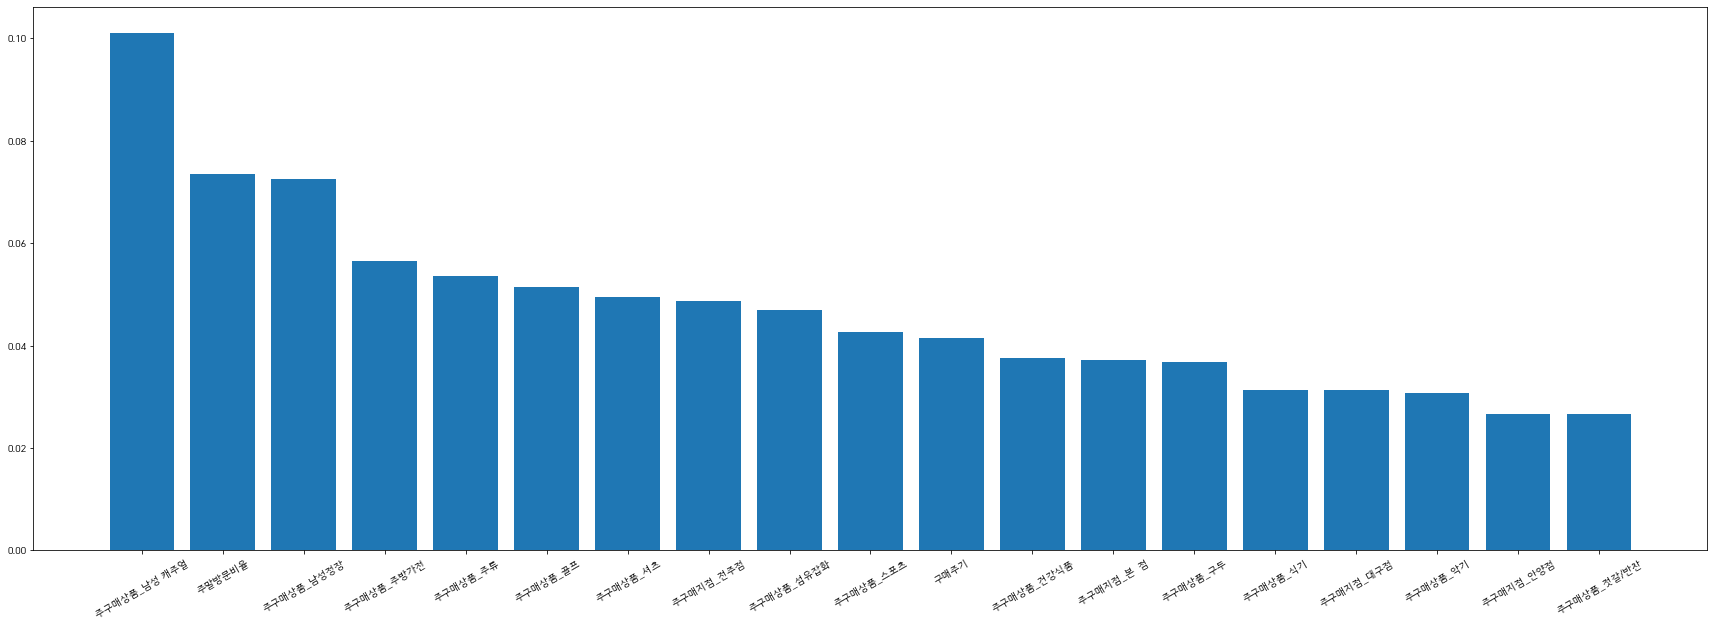

In [34]:
# 양의 상관관계
plt.figure(figsize=(30, 10))
plt.xticks(rotation=30)
plt.bar(df_cor2.index[1:20],df_cor2["gender"][1:20])

<BarContainer object of 12 artists>

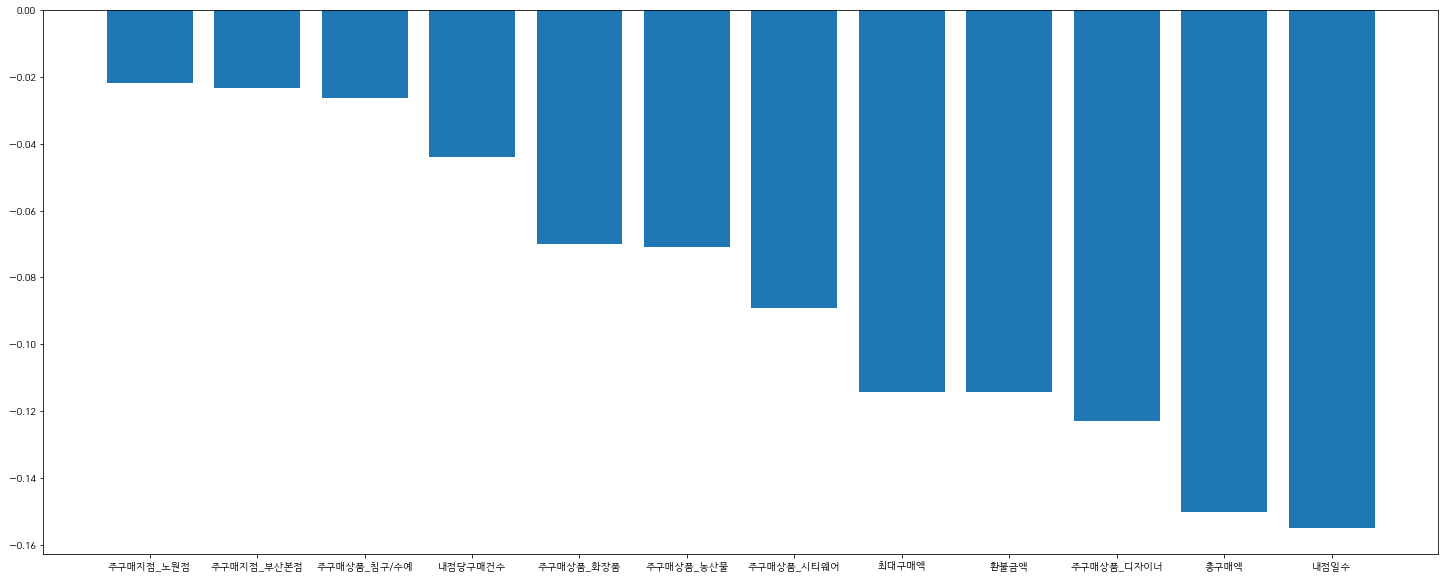

In [35]:
# 음의 상관관계
plt.figure(figsize=(25, 10))
plt.bar(df_cor2.index[60:],df_cor2["gender"][60:])

<BarContainer object of 19 artists>

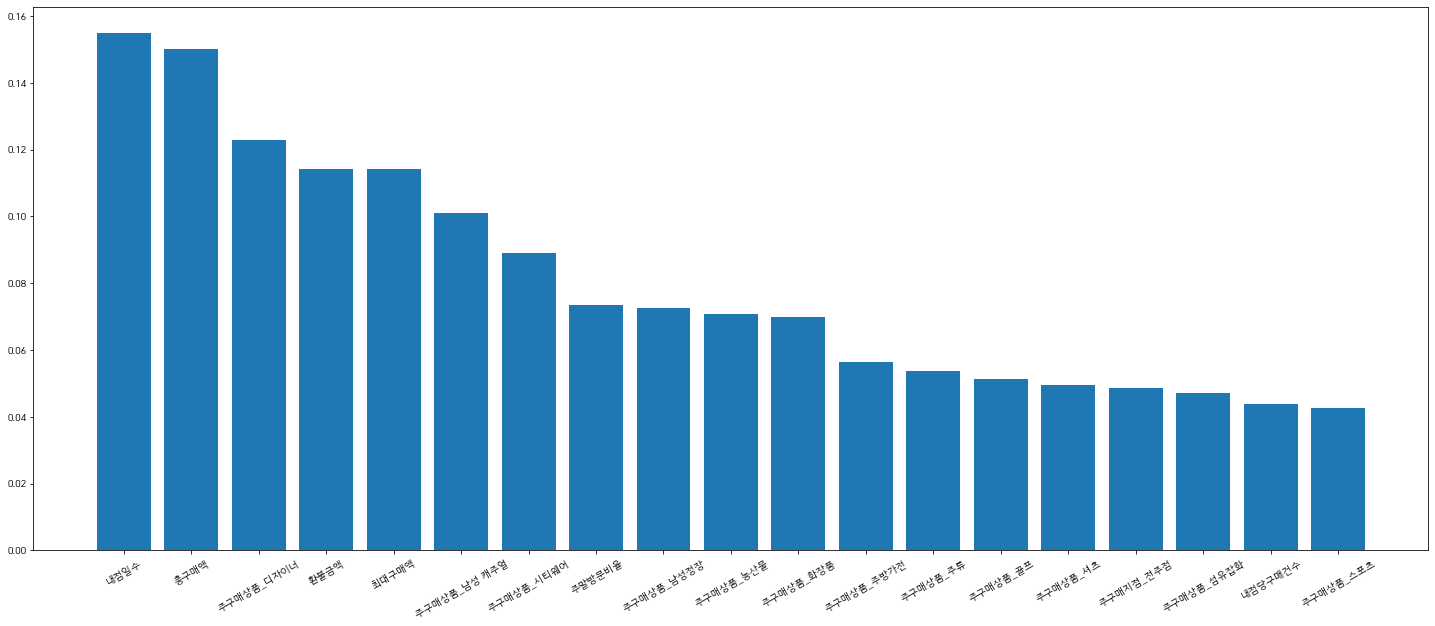

In [80]:
# 높은 상관관계
plt.figure(figsize=(25, 10))
plt.xticks(rotation=30)
plt.bar(df_cor.index[1:20],df_cor["gender"][1:20])

<BarContainer object of 12 artists>

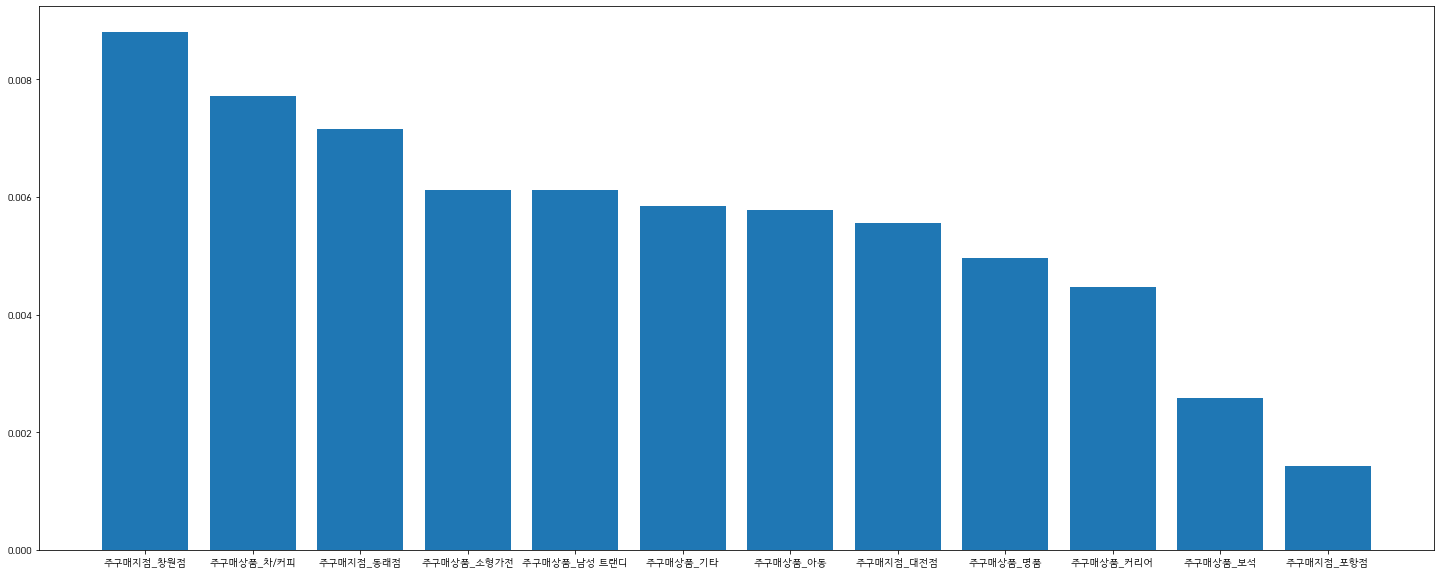

In [37]:
# 낮은 상관관계
plt.figure(figsize=(25, 10))
plt.bar(df_cor.index[60:],df_cor["gender"][60:])

<AxesSubplot:>

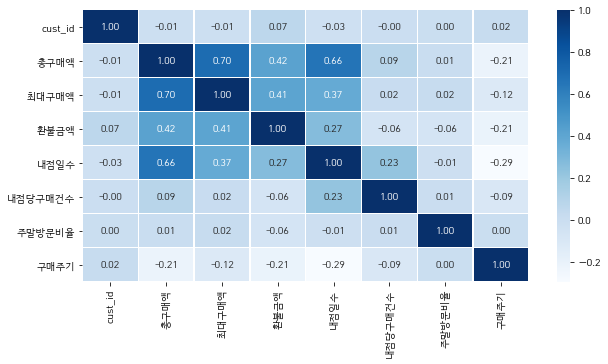

In [38]:
# 변수별 상관관계
plt.figure(figsize=(10,5))
sns.heatmap(data = X_train.corr(), annot = True,
            fmt = '.2f', linewidths=.5, cmap="Blues")

In [302]:
new_X = new_X.drop("cust_id",axis=1)
new_X

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가구,주구매상품_건강식품,주구매상품_골프,...,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
0,68282840,11264000,6860000.000,19,3.895,0.527,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2136000,2136000,300000.000,2,1.500,0.000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3197000,1639000,0.000,2,2.000,0.000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16077620,4935000,0.000,18,2.444,0.318,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29050000,24000000,0.000,2,1.500,0.000,85,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,82581500,23976000,0.000,8,1.750,0.643,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2478,480000,480000,0.000,1,1.000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2479,260003790,25750000,0.000,19,3.737,0.915,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2480,88991520,18120000,0.000,5,3.600,0.444,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### test

In [303]:
# train test 분리
from sklearn.model_selection import train_test_split

sX_train, sX_test, sy_train, sy_test = train_test_split(new_X[:3500], y_train["gender"], test_size=0.25 , random_state=42, stratify=y_train["gender"])

In [135]:
# train test 분리
from sklearn.model_selection import train_test_split

sX_train, sX_test = train_test_split(new_X[:3500], test_size=0.25 , random_state=42)
sy_train, sy_test = train_test_split(y_train["gender"], test_size=0.25, random_state=42)

In [304]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [305]:
a = pd.DataFrame(scaler.fit_transform(sX_train.iloc[:,:7]), columns=sX_train.columns[:7],
                 index=sX_train.index)
st_train = pd.concat([a,sX_train.iloc[:,7:]],axis=1)
b = pd.DataFrame(scaler.transform(sX_test.iloc[:,:7]), columns=sX_test.columns[:7],
                 index=sX_test.index)
st_test = pd.concat([b,sX_test.iloc[:,7:]],axis=1)
c = pd.DataFrame(mm_scaler.fit_transform(sX_train.iloc[:,:7]), columns=sX_train.columns[:7],
                 index=sX_train.index)
mm_train = pd.concat([a,sX_train.iloc[:,7:]],axis=1)
d = pd.DataFrame(mm_scaler.transform(sX_test.iloc[:,:7]), columns=sX_test.columns[:7],
                 index=sX_test.index)
mm_test = pd.concat([b,sX_test.iloc[:,7:]],axis=1)

### 로지스틱

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# standard
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(st_train,sy_train)
log_y_pred = log_reg.predict_proba(st_test)
log_score = roc_auc_score(sy_test,log_y_pred[:,1])
print(log_score)

0.6383758085885745


In [307]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=2000)
kn_clf.fit(st_train,sy_train)
y_pred = kn_clf.predict_proba(st_test)
roc_auc_score(sy_test,y_pred[:,1])

0.5757874344500484

In [308]:
# minmax
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(mm_train,sy_train)
log_y_pred = log_reg.predict_proba(mm_test)
log_score = roc_auc_score(sy_test,log_y_pred[:,1])
print(log_score)

0.6383758085885745


### 랜덤포레스트

In [309]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,10,12,20]
}


rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(st_train,sy_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 10, 12, 20],
                         'n_estimators': [100]})

In [310]:
grid_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [240]:
grid_cv.best_score_

0.6514272147195957

In [241]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth = 8, min_samples_leaf=8,
                                min_samples_split=8,random_state=42)
rnd_clf.fit(st_train,sy_train)
rnd_y_pred = rnd_clf.predict_proba(st_test)
rnd_scores = roc_auc_score(sy_test, rnd_y_pred[:,1])
print(rnd_scores)

0.6478116614894731


In [341]:
import sklearn.model_selection
dir(sklearn.model_selection)[:5]

['BaseCrossValidator',
 'GridSearchCV',
 'GroupKFold',
 'GroupShuffleSplit',
 'KFold']

### 변수 중요도에 따른 축소

In [165]:
colname = new_X.columns

In [170]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth = 8, min_samples_leaf=8,
                                min_samples_split=8,random_state=42)
rnd_clf.fit(st_train,sy_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                       random_state=42)

In [171]:
rnd_clf.feature_importances_

array([1.37409998e-01, 1.16652290e-01, 1.26055045e-01, 1.46862947e-01,
       6.43637142e-02, 1.07709252e-01, 9.09974013e-02, 0.00000000e+00,
       5.73157844e-04, 5.35875751e-03, 1.60125965e-03, 5.19563658e-03,
       1.84211224e-02, 0.00000000e+00, 9.91016662e-03, 1.07755062e-02,
       0.00000000e+00, 3.24182391e-02, 0.00000000e+00, 2.43564938e-03,
       1.85134827e-03, 0.00000000e+00, 0.00000000e+00, 2.03907557e-03,
       1.60616303e-03, 0.00000000e+00, 2.01959900e-03, 9.01634426e-03,
       2.15864175e-02, 0.00000000e+00, 2.88805338e-04, 0.00000000e+00,
       0.00000000e+00, 9.85465823e-04, 1.90118364e-03, 7.12300028e-04,
       0.00000000e+00, 1.38751926e-03, 3.84114190e-04, 7.16256455e-04,
       3.16590807e-04, 0.00000000e+00, 2.85955848e-03, 0.00000000e+00,
       0.00000000e+00, 1.15135277e-04, 1.84945321e-03, 2.03167579e-02,
       1.81933994e-04, 4.89111395e-03, 2.63440085e-03, 0.00000000e+00,
       7.52977457e-04, 7.69045191e-04, 1.25853455e-03, 1.58365393e-02,
      

In [181]:
imp = rnd_clf.feature_importances_
df_imp = pd.DataFrame(imp,index=colname, columns=["importance"])
df_imp[df_imp["importance"] == 0]

,importance
주구매상품_가구,0.000
주구매상품_남성 트랜디,0.000
주구매상품_대형가전,0.000
주구매상품_란제리/내의,0.000
주구매상품_보석,0.000
주구매상품_생활잡화,0.000
주구매상품_소형가전,0.000
주구매상품_식기,0.000
주구매상품_악기,0.000
주구매상품_액세서리,0.000


In [182]:
dind = df_imp[df_imp.importance == 0].index

In [184]:
nnew_X = new_X.drop(dind,axis=1)

In [203]:
# train test 분리
from sklearn.model_selection import train_test_split

sX_train, sX_test, sy_train, sy_test = train_test_split(nnew_X[:3500], y_train["gender"], test_size=0.25 , random_state=42, stratify=y_train["gender"])

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
mm_scaler = MinMaxScaler()

a = pd.DataFrame(scaler.fit_transform(sX_train.iloc[:,:7]), columns=sX_train.columns[:7],
                 index=sX_train.index)
st_train = pd.concat([a,sX_train.iloc[:,7:]],axis=1)
b = pd.DataFrame(scaler.transform(sX_test.iloc[:,:7]), columns=sX_test.columns[:7],
                 index=sX_test.index)
st_test = pd.concat([b,sX_test.iloc[:,7:]],axis=1)
c = pd.DataFrame(mm_scaler.fit_transform(sX_train.iloc[:,:7]), columns=sX_train.columns[:7],
                 index=sX_train.index)
mm_train = pd.concat([a,sX_train.iloc[:,7:]],axis=1)
d = pd.DataFrame(mm_scaler.transform(sX_test.iloc[:,:7]), columns=sX_test.columns[:7],
                 index=sX_test.index)
mm_test = pd.concat([b,sX_test.iloc[:,7:]],axis=1)

In [198]:
params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,10,12,14],
    'min_samples_split':[8,10,12,14]
}


rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(st_train,sy_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 10, 12, 14],
                         'min_samples_split': [8, 10, 12, 14],
                         'n_estimators': [100]})

In [199]:
grid_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 12,
 'min_samples_split': 8,
 'n_estimators': 100}

In [200]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth =8, min_samples_leaf=12,
                                 min_samples_split=8,random_state=42)
rnd_clf.fit(st_train,sy_train)
rnd_y_pred = rnd_clf.predict_proba(st_test)
rnd_scores = roc_auc_score(sy_test, rnd_y_pred[:,1])
print(rnd_scores)

0.6965850174882193


In [201]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1], 'k--')

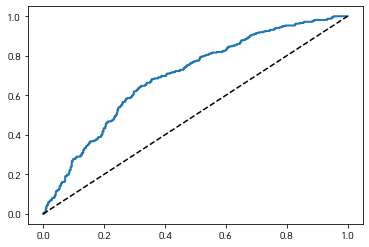

In [202]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(sy_test,rnd_y_pred[:,1])
plot_roc_curve(fpr,tpr,"랜덤 포레스트")
plt.show()

### PCA로 변수 축소

In [204]:
# train test 분리
from sklearn.model_selection import train_test_split

sX_train, sX_test, sy_train, sy_test = train_test_split(new_X[:3500], y_train["gender"], test_size=0.25 , random_state=42, stratify=y_train["gender"])

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
mm_scaler = MinMaxScaler()

a = pd.DataFrame(scaler.fit_transform(sX_train.iloc[:,:7]), columns=sX_train.columns[:7],
                 index=sX_train.index)
st_train = pd.concat([a,sX_train.iloc[:,7:]],axis=1)
b = pd.DataFrame(scaler.transform(sX_test.iloc[:,:7]), columns=sX_test.columns[:7],
                 index=sX_test.index)
st_test = pd.concat([b,sX_test.iloc[:,7:]],axis=1)
c = pd.DataFrame(mm_scaler.fit_transform(sX_train.iloc[:,:7]), columns=sX_train.columns[:7],
                 index=sX_train.index)
mm_train = pd.concat([a,sX_train.iloc[:,7:]],axis=1)
d = pd.DataFrame(mm_scaler.transform(sX_test.iloc[:,:7]), columns=sX_test.columns[:7],
                 index=sX_test.index)
mm_test = pd.concat([b,sX_test.iloc[:,7:]],axis=1)

In [228]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40)
X_reduced = pca.fit_transform(st_train)
X_reduced_test = pca.transform(st_test)
X_recovered = pca.inverse_transform(X_reduced)
pca.explained_variance_ratio_.sum()

0.9873638985041826

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_reduced,sy_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [230]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=20,
                       n_jobs=-1, random_state=42)

In [231]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth = 6, min_samples_leaf=8,
                                 min_samples_split=20,random_state=42)
rnd_clf.fit(X_reduced,sy_train)
rnd_y_pred = rnd_clf.predict_proba(X_reduced_test)
rnd_scores = roc_auc_score(sy_test, rnd_y_pred[:,1])
print(rnd_scores)


0.6459161405969917


### 혼동행렬

In [252]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

print(confusion_matrix(sy_train, rnd_clf.predict(st_train)))
recall_score(sy_train, rnd_clf.predict(st_train))

[[1600  157]
 [ 722  321]]


0.3077660594439118

In [254]:
1600/(1600+157)

0.910643141718839

In [238]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth =8, min_samples_leaf=12,
                                 min_samples_split=8,random_state=42)
rnd_clf.fit(st_train,sy_train)
rnd_y_pred = rnd_clf.predict_proba(st_test)
rnd_scores = roc_auc_score(sy_test, rnd_y_pred[:,1])
print(rnd_scores)

rnd_clf = RandomForestClassifier(n_estimators=100, max_depth =8, min_samples_leaf=12,
                                 min_samples_split=8,random_state=42)
rnd_clf.fit(mm_train,sy_train)
rnd_y_pred = rnd_clf.predict_proba(mm_test)
rnd_scores = roc_auc_score(sy_test, rnd_y_pred[:,1])
print(rnd_scores)

0.6913511936931139
0.69131687984147


### 서포트 벡터

In [242]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params ={
    'C':[0.01,0.1,5,7,9]
}

svc = SVC(kernel="linear",random_state=42)
grid_cv = GridSearchCV(svc, param_grid=params, cv=2, n_jobs=1)
grid_cv.fit(st_train,sy_train)

GridSearchCV(cv=2, estimator=SVC(kernel='linear', random_state=42), n_jobs=1,
             param_grid={'C': [0.01, 0.1, 5, 7, 9]})

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params ={
    'C':[1,5,10,20],
    'gamma' : [0.01,0.1,1,5]
}

svc = SVC(kernel="rbf",random_state=42)
grid_cv = GridSearchCV(svc, param_grid=params, cv=2, n_jobs=1)
grid_cv.fit(st_train,sy_train)

GridSearchCV(cv=2, estimator=SVC(random_state=42), n_jobs=1,
             param_grid={'C': [1, 5, 10, 20], 'gamma': [0.01, 0.1, 1, 5]})

In [243]:
grid_cv.best_params_

{'C': 0.1}

In [244]:
grid_cv.best_score_

0.6323816246540226

In [245]:
svc_clf = SVC(kernel="linear", C=0.1,probability=True)
svc_clf.fit(st_train,sy_train)
svc_y_pred = svc_clf.predict_proba(st_test)
roc_auc_score(sy_test, svc_y_pred[:,1])

0.6110313192380061

In [32]:
svc_clf = SVC(kernel="rbf",C=5,gamma=0.01,probability=True,random_state = 42)
svc_clf.fit(st_train,sy_train)
svc_y_pred = svc_clf.predict_proba(st_test)
svc_score = roc_auc_score(sy_test,svc_y_pred[:,1])
svc_score

0.6455379125168352

In [120]:
svc_clf = SVC(kernel="rbf",C=20,gamma=0.01,probability=True,random_state = 42)
svc_clf.fit(mm_train,sy_train)
svc_y_pred = svc_clf.predict_proba(mm_test)
svc_score = roc_auc_score(sy_test,svc_y_pred[:,1])
svc_score

0.6720539413747845

In [25]:
import xgboost

xgb_clf = xgboost.XGBClassifier()
xgb_clf.fit(st_train,sy_train,eval_set=[(st_test,sy_test)])
y_pred = xgb_clf.predict_proba(st_test)
score = roc_auc_score(sy_test, y_pred[:,1])
score

[17:42:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66218
[1]	validation_0-logloss:0.64435
[2]	validation_0-logloss:0.63575
[3]	validation_0-logloss:0.62547
[4]	validation_0-logloss:0.61895
[5]	validation_0-logloss:0.61916
[6]	validation_0-logloss:0.61743
[7]	validation_0-logloss:0.61358
[8]	validation_0-logloss:0.61284
[9]	validation_0-logloss:0.61084
[10]	validation_0-logloss:0.61095
[11]	validation_0-logloss:0.61084
[12]	validation_0-logloss:0.61498
[13]	validation_0-logloss:0.61665
[14]	validation_0-logloss:0.61676
[15]	validation_0-logloss:0.61680
[16]	validation_0-logloss:0.61735
[17]	validation_0-logloss:0.61739
[18]	validation_0-logloss:0.61709
[19]	validation_0-logloss:0.61808
[20]	validation_0-lo

0.6487482708593407

### 보팅

In [246]:
from sklearn.ensemble import VotingClassifier

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth =8, min_samples_leaf=8,
                                min_samples_split=8,random_state=42)
svc_clf = SVC(kernel="linear", C=0.1,probability=True)

vot_clf = VotingClassifier(estimators=[('lr',log_reg),('rf',rnd_clf),
                                       ('sv',svc_clf)],
                          voting='soft')
vot_clf.fit(st_train,sy_train)
pred = vot_clf.predict_proba(st_test)

In [247]:
from sklearn.metrics import roc_auc_score
scores = roc_auc_score(sy_test,pred[:,1])
scores

0.651697340147188

### 데이터 csv 저장

In [281]:
cust_id = X["cust_id"][3500:]
cust_id = pd.DataFrame(cust_id)

In [282]:
man = pd.DataFrame(scaler.transform(new_X[3500:].iloc[:,:7]))
man = pd.concat([man,new_X[3500:].iloc[:,7:]],axis=1)
man.shape

(2482, 72)

In [283]:
man_proba = vot_clf.predict_proba(man)
gender = man_proba[:,1].round(3)

ValueError: X has 72 features per sample; expecting 71

In [284]:
result = pd.DataFrame(gender)

In [285]:
df = pd.concat([cust_id, result], ignore_index=True,axis=1)
df = df.rename(columns = {0 : "custid", 1: "gender"})
df.head()

,custid,gender
0,3500,0.463
1,3501,0.226
2,3502,0.244
3,3503,0.349
4,3504,0.413


In [258]:
df.to_csv("수험번호.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 2481
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  5982 non-null   int64  
 1   총구매액     5982 non-null   int64  
 2   최대구매액    5982 non-null   int64  
 3   환불금액     5982 non-null   float64
 4   주구매상품    5982 non-null   object 
 5   주구매지점    5982 non-null   object 
 6   내점일수     5982 non-null   int64  
 7   내점당구매건수  5982 non-null   float64
 8   주말방문비율   5982 non-null   float64
 9   구매주기     5982 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 514.1+ KB
       총구매액     최대구매액        환불금액  내점일수  내점당구매건수  주말방문비율  구매주기  주구매상품_가구  \
0  68282840  11264000 6860000.000    19    3.895   0.527    17         0   
1   2136000   2136000  300000.000     2    1.500   0.000     1         0   
2   3197000   1639000       0.000     2    2.000   0.000     1         0   

   주구매상품_건강식품  주구매상품_골프  ...  주구매지점_안양점  주구매지점_영등포점  주구매지점_울산점  주구매지

,cust_id,gender
0,3500,0.473
1,3501,0.222
2,3502,0.237
3,3503,0.352
4,3504,0.411
...,...,...
2477,5977,0.480
2478,5978,0.498
2479,5979,0.718
2480,5980,0.424


In [3]:
import pandas as pd
import numpy as np

def csv(filename):
	return pd.read_csv("빅분기 실기/"+filename+'.csv', encoding='cp949')

train_X,test_X,train_y = csv('X_train'),csv('X_test'),csv('y_train')

X = pd.concat([train_X,test_X])

X = X.fillna(0)
print(X.columns)
X["총구매액"] = X["총구매액"].map(lambda x: 0 if x < 0 else x)
X["최대구매액"] = X["최대구매액"].map(lambda x: 0 if x < 0 else x)

print(train_X.shape)

from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()
scale_columns = ["총구매액","최대구매액","환불금액","내점일수","내점당구매건수","주말방문비율","구매주기"]
X[scale_columns] = scaler.fit_transform(X[scale_columns])

new_train_X = pd.get_dummies(X,drop_first=True)

new_train_X = new_train_X.drop("cust_id",axis=1)

print(new_train_X.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_train_X[:3500],train_y["gender"],test_size=0.2,
																								 random_state=42,stratify=train_y["gender"])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

from sklearn.ensemble import RandomForestClassifier
# from skelarn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# params = {
# 	'n_estimators' : [100],
# 	'max_depth' : [4,6,8,10],
# 	'min_samples_leaf' : [4,6,8,10],
# 	'min_samples_split' : [2,4,6]
# }
# rnd_clf = RandomForestClassifier(random_state=42)
# grid_cv = GridSearchCV(rnd_clf, param_grid=params, cv=3, n_jobs=-1)
# grid_cv.fit(X_train,y_train)
# print(grid_cv.best_params_)

rf = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_leaf=4,min_samples_split=2,random_state=42)
# rf.fit(X_train,y_train)
# rf_pred = rf.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
# rf_score = roc_auc_score(y_test,rf_pred[:,1])

# print(rf_score)

# import xgboost
# xgb_clf = xgboost.XGBClassifier(random_state=42)
# xgb_clf.fit(X_train,y_train)
# xgb_pred = xgb_clf.predict_proba(X_test)
# score = roc_auc_score(y_test,xgb_pred[:,1])
# print(score)

from sklearn.svm import SVC
# svc_clf = SVC(kernel="linear",random_state=42,probability=True)
# params = {
# 	'C' : [0.01,0.1,1]
# }
# grid_cv = GridSearchCV(svc_clf,param_grid=params,cv=3,n_jobs=-1)
# grid_cv.fit(X_train,y_train)
# print(grid_cv.best_params_)


svc_clf = SVC(kernel="linear",C=0.01,random_state=42,probability=True)
# svc_clf.fit(X_train,y_train)
# svc_pred = svc_clf.predict_proba(X_test)
# score = roc_auc_score(y_test,svc_pred[:,1])
# print(score)

from sklearn.linear_model import LogisticRegression
ln_clf = LogisticRegression()
# # ln_clf.fit(X_train,y_train)
# # ln_pred = ln_clf.predict_proba(X_test)
# # score = roc_auc_score(y_test,ln_pred[:,1])
# # print(score)

from sklearn.ensemble import VotingClassifier

vot_clf = VotingClassifier(estimators=[('lr',ln_clf),('rf',rf),('svc',svc_clf)], voting='soft')
vot_clf.fit(X_train,y_train)
vot_pred = vot_clf.predict_proba(X_test)
score = roc_auc_score(y_test, vot_pred[:,1])
print(score)

from sklearn.model_selection import StratifiedKFold
stf = StratifiedKFold(n_splits=5,shuffle=True)
KFscore = []
KFpred = []
clf_list = []

for tr_index,te_index in stf.split(new_train_X[:3500],train_y["gender"]):
    new_X_train,new_X_test = new_train_X.iloc[tr_index,:] , new_train_X.iloc[te_index,:]
    new_y_train,new_y_test = train_y["gender"][tr_index], train_y["gender"][te_index]
    clf = vot_clf
    clf.fit(new_X_train,new_y_train)
    pred = vot_clf.predict_proba(new_X_test)
    score = roc_auc_score(new_y_test,pred[:,1])
    KFpred.append(pred[:,1])
    KFscore.append(score)
    clf_list.append(clf)
    
print(KFscore)

# # pred = vot_clf.predict_proba(new_train_X[3500:])
pred_list = []
for model in clf_list:
    pred = model.predict_proba(new_train_X[3500:])[:,1]
    pred_list.append(pred)
# result = pd.DataFrame()
# result["cust_id"] = test_X["cust_id"]
# result["gender"] = pred
# print(result)

Index(['cust_id', '총구매액', '최대구매액', '환불금액', '주구매상품', '주구매지점', '내점일수', '내점당구매건수',
       '주말방문비율', '구매주기'],
      dtype='object')
(3500, 10)
(5982, 71)
(2800, 71) (700, 71) (2800,) (700,)
0.6627367724982816
[0.6197022561362904, 0.6792336271328014, 0.693320340030105, 0.7279019585664441, 0.6871959271615236]


In [5]:
vot_clf.classes_

array([0, 1], dtype=int64)